In [19]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional, GRU
from tensorflow.keras.layers import Dense, Dropout

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#load csv file
Train = pd.read_csv("train.csv")
data=Train
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test_data = pd.read_csv("test.csv")
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
data.label.value_counts()

0    20109
1     1493
Name: label, dtype: int64

In [7]:
data.shape

(21602, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


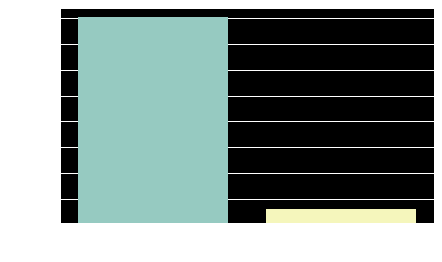

In [8]:
import seaborn as sns
ax=sns.countplot(data.label)

In [9]:
# removing usernames from tweet
data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
# removing usernames from test_data
test_data['new_tweet'] = test_data.tweet.str.replace('@user', '')
test_data.head()
ids = test_data['id']

In [12]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [13]:
test_data['new_tweet'] = test_data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
test_data['new_tweet'] = test_data['new_tweet'].str.replace("#", "")
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday to my amazing hilarious nephew e...


In [14]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('the', 6948),
 ('to', 6623),
 ('i', 5165),
 ('a', 4397),
 ('you', 3979),
 ('and', 3351),
 ('in', 3154),
 ('for', 3094),
 ('of', 2931),
 ('is', 2857)]

In [15]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [16]:
test_data['new_tweet'] = test_data['new_tweet'].apply(lambda x: x.split())
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolife, aislife, requires, passion, dedic..."
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacists, want, everyone, to, see,..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[rd, bihday, to, my, amazing, hilarious, nephe..."


In [17]:
#stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [18]:
test_data['new_tweet']= test_data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolif, aislif, requir, passion, dedic, wi..."
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacist, want, everyon, to, see, t..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, way, to, heal, your, acn, altwaystoh, h..."
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, curs, child, book, up,..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[rd, bihday, to, my, amaz, hilari, nephew, eli..."


In [20]:
# Stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

In [22]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [23]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[father, hi, selfish, drag, kid, run, dysfunct]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[van, pdx, getthank, thank, lyft, wheelchair, ..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[time, love, take, model]"
4,5,0,factsguide: society now #motivation,"[factsguid, motiv, societi]"


In [24]:
# test_data
test_data['new_tweet'] = test_data['new_tweet'].apply(process) 
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolif, aislif, requir, passion, willpow, ..."
1,31964,@user #white #supremacists want everyone to s...,"[see, whi, white, everyon, movi, bird, new, su..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[healthi, acn, safe, way, heal, altwaystoh]"
3,31966,is the hp and the cursed child book up for res...,"[alreadi, pottermor, child, book, harrypott, c..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[bihday, amaz, miss, eli, love, ahmir, uncl, d..."


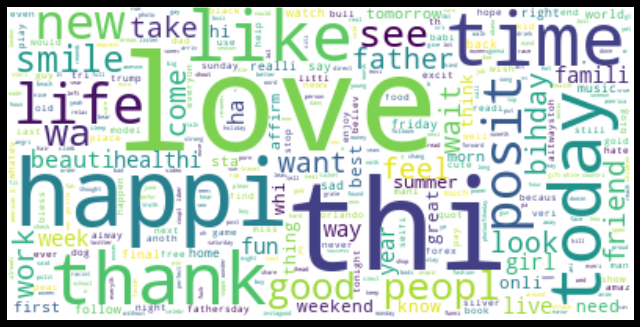

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()  

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,father hi selfish drag kid run dysfunct
1,2,0,@user @user thanks for #lyft credit i can't us...,van pdx getthank thank lyft wheelchair disapoi...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,time love take model
4,5,0,factsguide: society now #motivation,factsguid motiv societi


In [28]:
test_data['new_tweet'] = test_data['new_tweet'].apply(string)
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolif aislif requir passion willpow find d...
1,31964,@user #white #supremacists want everyone to s...,see whi white everyon movi bird new supremacis...
2,31965,safe ways to heal your #acne!! #altwaystohe...,healthi acn safe way heal altwaystoh
3,31966,is the hp and the cursed child book up for res...,alreadi pottermor child book harrypott curs re...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday amaz miss eli love ahmir uncl dave hila...


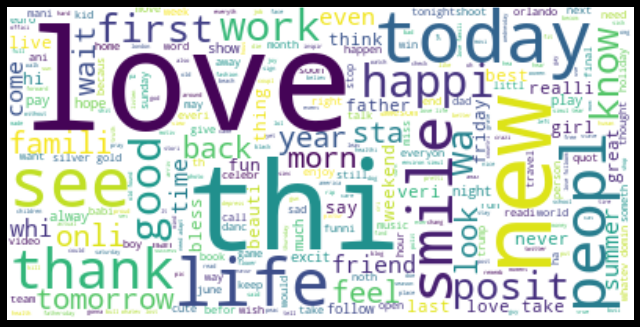

In [29]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

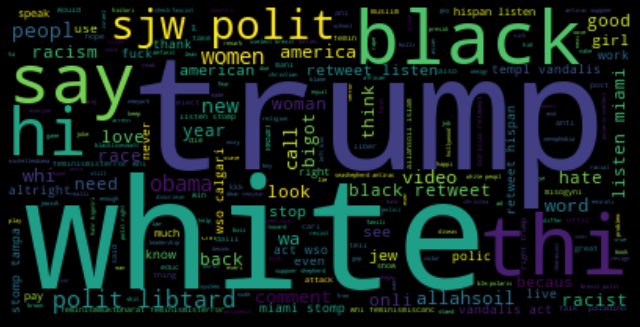

In [30]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,father hi selfish drag kid run dysfunct
1,0,van pdx getthank thank lyft wheelchair disapoi...
2,0,bihday majesti
3,0,time love take model
4,0,factsguid motiv societi


In [32]:
test_data.drop(["id","tweet" ],axis=1,inplace=True)
test_data.head()

,new_tweet
0,studiolif aislif requir passion willpow find d...
1,see whi white everyon movi bird new supremacis...
2,healthi acn safe way heal altwaystoh
3,alreadi pottermor child book harrypott curs re...
4,bihday amaz miss eli love ahmir uncl dave hila...


In [35]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (17281,) (17281,)
testing set : (4321,) (4321,)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [36]:
test_x = test_data['new_tweet']
test_x

0        studiolif aislif requir passion willpow find d...
1        see whi white everyon movi bird new supremacis...
2                     healthi acn safe way heal altwaystoh
3        alreadi pottermor child book harrypott curs re...
4        bihday amaz miss eli love ahmir uncl dave hila...
                               ...                        
17192    factori left blm polaris uselect brexit polit ...
17193    like gown formal dress neverreadi hairflip mer...
17194    like hillari clinton campaign ohio use omg tod...
17195    cultur work confer right organ develop lead ha...
17196       newmus download glad newsong shoegaz song free
Name: new_tweet, Length: 17197, dtype: object

In [37]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(17281, 21180)
(17281, 21180)


In [40]:
test_x_counts = count_vect.transform(test_x)
test_x_tfidf = transformer.transform(test_x_counts)

print(test_x_counts.shape)
print(test_x_tfidf.shape)

(17197, 21180)
(17197, 21180)


In [41]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(4321, 21180)
(4321, 21180)


# **Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [43]:
predictions = model.predict(x_test_tfidf)

In [44]:
submission  = model.predict(test_x_tfidf)

In [45]:
# Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

96.0425827354779

In [46]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[4014,   16],
       [ 155,  136]])

In [47]:
#f1-score
f1_score(y_test,predictions)

0.6139954853273137

In [48]:

from __future__ import print_function


# Special END separator
END = '0e8ed89a-47ba-4cdb-938e-b8af8e084d5c'

# Text attributes
ALL_OFF = '\033[0m'
BOLD = '\033[1m'
UNDERSCORE = '\033[4m'
BLINK = '\033[5m'
REVERSE = '\033[7m'
CONCEALED = '\033[7m'

# Foreground colors
FG_BLACK = '\033[30m'
FG_RED = '\033[31m'
FG_GREEN = '\033[32m'
FG_YELLOW = '\033[33m'
FG_BLUE = '\033[34m'
FG_MAGENTA = '\033[35m'
FG_CYAN = '\033[36m'
FG_WHITE = '\033[37m'

# Background colors
BG_BLACK = '\033[40m'
BG_RED = '\033[41m'
BG_GREEN = '\033[42m'
BG_YELLOW = '\033[43m'
BG_BLUE = '\033[44m'
BG_MAGENTA = '\033[45m'
BG_CYAN = '\033[46m'
BG_WHITE = '\033[47m'


class pretty_output():
    '''
    Context manager for pretty terminal prints
    '''

    def __init__(self, *attr):
        self.attributes = attr

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        pass

    def write(self, msg):
        style = ''.join(self.attributes)
        print('{}{}{}'.format(style, msg.replace(END, ALL_OFF + style), ALL_OFF))


if __name__ == '__main__':

    with pretty_output(FG_RED) as out:
        out.write('This is a test in RED')

    with pretty_output(FG_BLUE) as out:
        out.write('This is a test in BLUE')

    with pretty_output(BOLD, FG_GREEN) as out:
        out.write('This is a bold text in green')

    with pretty_output(BOLD, BG_GREEN) as out:
        out.write('This is a text with green background')

    with pretty_output(FG_GREEN) as out:
        out.write('This is a green text with ' + BOLD + 'bold' + END + ' text included')

    with pretty_output() as out:
        out.write(BOLD + 'Use this' + END + ' even with ' + BOLD + FG_RED + 'no parameters' + END + ' in the with statement')

This is a test in RED
This is a test in BLUE
This is a bold text in green
This is a text with green background
This is a green text with bold text included
Use this even with no parameters in the with statement


In [49]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T

with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST                 ')
df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'],)

                 RANDOM FOREST                 


,precision,recall,f1-score,support
0,0.996030,0.962821,0.979144,4169.000000
1,0.467354,0.894737,0.613995,152.000000
accuracy,0.960426,0.960426,0.960426,0.960426
macro avg,0.731692,0.928779,0.796570,4321.000000
weighted avg,0.977433,0.960426,0.966299,4321.000000


In [50]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 'NEG' else 'green'
    return 'color: %s' % color

In [51]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Label'])
tweets['Tweets'] = x_test
tweets['Prediction'] = predictions
tweets['Label'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST Tweets Prediction                ')
(tweets.sample(10).style.applymap(color_negative_red, subset=['Prediction', 'Label']))

                 RANDOM FOREST Tweets Prediction                


,Tweets,Prediction,Label
4609,greatday yourmysweet anoth sigiriyarock tuktuk sigiriya kandi srilanka,POS,POS
1530,time love take model,POS,POS
9085,watch intens finish benghazi,POS,POS
10425,parent actual glad back inshaallah today im,POS,POS
9560,matter noth els park love keep peopl natur,POS,POS
9992,completli anymor word silli stupid,POS,POS
19971,thi buffalo vicin way home simul take yellowcab,POS,POS
16178,read childish rude comment instagram bestfeatur want stupid,POS,NEG
14582,hea beach,POS,POS
8645,hbd left minut anjanamam wait,POS,POS


# **Logistic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [53]:
log_predictions = logmodel.predict(x_test_tfidf)

In [54]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[4023,    7],
       [ 223,   68]])

In [55]:
f1_score(y_test,log_predictions)

0.37158469945355194

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

94.67715806526267

In [57]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission-log.csv',index=False)
submission_df.head(5)

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


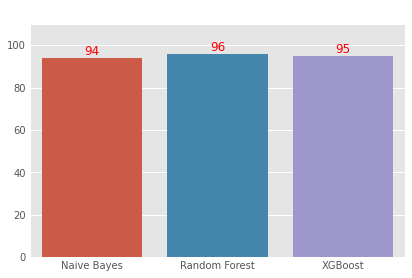

In [58]:
models = ["Naive Bayes", 'Random Forest', 'XGBoost']
acc = [94, 96, 95]
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.barplot(models, acc, );
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = 110 
ax.set_ylim([0, y_max])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.title('Accuracy of classifiers')
plt.show()